<a href="https://colab.research.google.com/github/HaEunMok/ML/blob/main/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4%5D_decision_tree_%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0_(scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sklearn
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

전처리가 반드시 모델의 성능을 높이지는 않으므로 EDA를 해보고 적용

- 범주형 변수를 수치형 변수로 변환
- 결측치 평균값으로 대체하기
- 결측치 중앙값으로 대체하기
- 수치형 변수를 정규분포 형태로 만들기 (log로 값을 변환하여 정규분포의 형태로 만들기)
- 상관계수를 이용하여 파생변수 생성하기

# Decision Tree

## 1. classification

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [ ]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [ ]:
# 모델 학습
# ㅌX가 0일 때는 0, 1일 때는 1로 예측하는 모델 학습
clf= clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [ ]:
# 예측
# 학습한 0과 1로만 결과가 산출
clf.predict([[2., 2.]])

array([1])

In [ ]:
# 비율로 예측
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

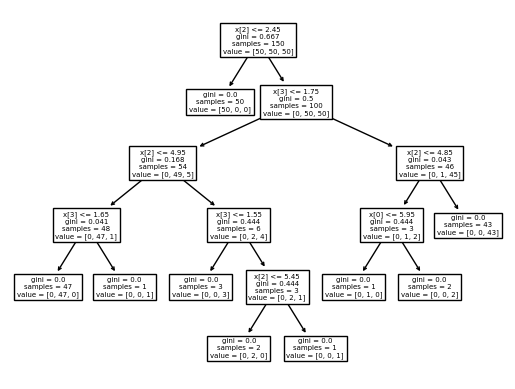

In [ ]:
tree.plot_tree(clf)

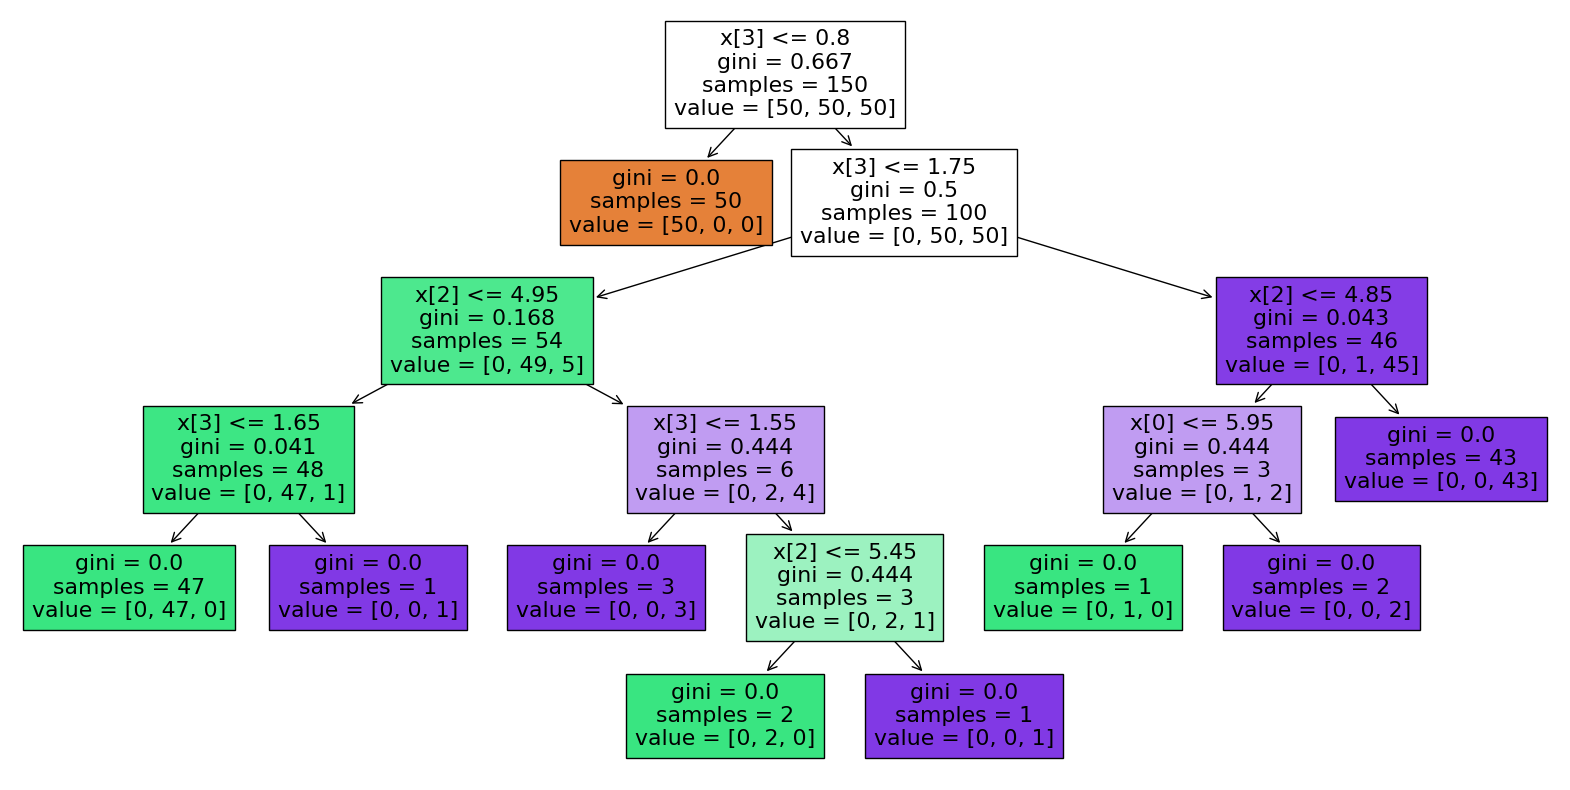

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
t=tree.plot_tree(clf.fit(X, y), filled=True)
#  filled 로 색 지정

## 2. 당뇨병 데이터셋을 이용한 의사결정나무 분류 모델 만들기




### 데이터

- pima 인디언들의 당뇨병에 대한 정보. 서구화된 식습관으로 인한 당뇨 데이터
- 당뇨병 여부를 예츨할 수 있는 데이터
- 숫자로만 이루어져 전처리가 필요하지 않음


Pregnancies : 임신 횟수

Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

BloodPressure : 이완기 혈압 (mm Hg)

SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

Insulin : 2시간 혈청 인슐린 (mu U / ml)

BMI : 체질량 지수 (체중kg / 키(m)^2)

DiabetesPedigreeFunction : 당뇨병 혈통 기능

Age : 나이

Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터셋 로드

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/ML DL/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# (성능향상법) 수치형 변수를 범주형 변수로 변경하기

수치데이터 -> 범주데이터 -> 수치데이터

**one - hot - encodind**

ML 성능향상을 위해 중요한 기법

항상 성능이 좋아지는 것은 아님


In [ ]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [ ]:
df['Age_low']=df['Age']<25
df['Age_middle']=(df['Age']>=25) & (df['Age']<=60)
df['Age_high']=df['Age']>60
df[["Age","Age_low","Age_high"]].head()

,Age,Age_low,Age_high
0,50,False,False
1,31,False,False
2,32,False,False
3,21,True,False
4,33,False,False


<Axes: xlabel='Age_high', ylabel='count'>

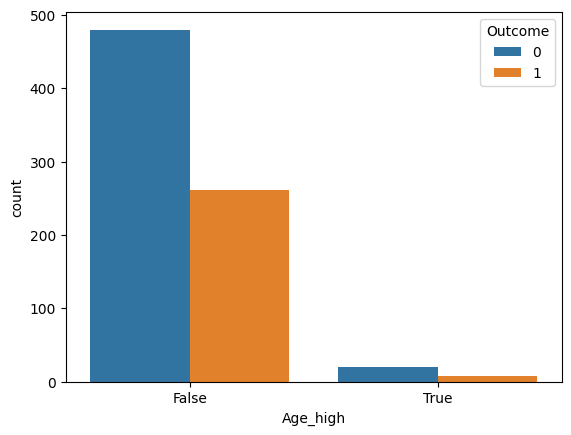

In [ ]:
sns.countplot(data=df, x="Age_high", hue='Outcome')

# 인슐린과 글루코스 간의 상관계수결측치 다루기

0인 값을 처리하기


In [ ]:
import matplotlib.pyplot as plt

왜도 : 치우친 정도
첨도 : 뾰족한 정도

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [ ]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [ ]:
df["Insulin_nan"].isnull().sum()

374

In [ ]:
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [ ]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

<ipython-input-21-bea675cdc2dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [ ]:
# 결측치 채우기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5

# (성능향상법) 수치형 변수를 정규분포 형태로 변환하기

<ipython-input-23-67b54882ed27>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

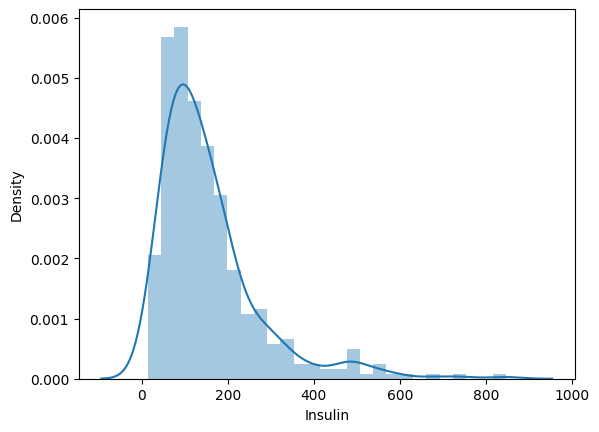

In [ ]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])

<ipython-input-24-8320c8a9b58c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))


<Axes: xlabel='Insulin', ylabel='Density'>

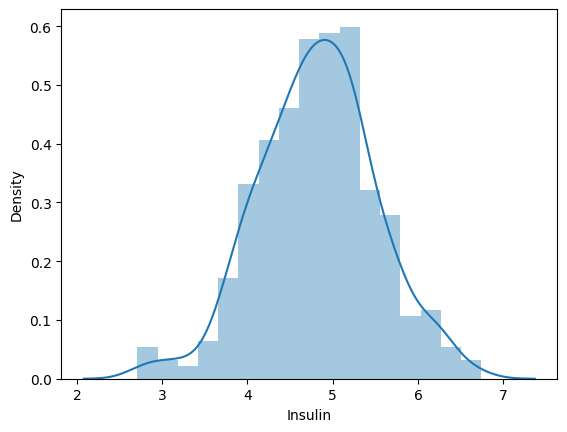

In [ ]:
# log를 취하면 정규분포 모양을 띔
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))

<ipython-input-25-687ea8964cd8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_nan"])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

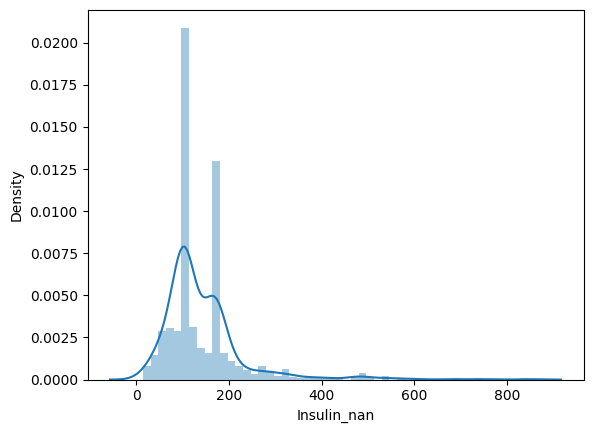

In [ ]:
# 임의로 중앙값을 채워주어, 뾰족하게 튀어나와 있으며, 중앙값인 값과 아닌 값으로 나뉨
sns.distplot(df["Insulin_nan"])

<ipython-input-26-2241a95e1467>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_log"])


<Axes: xlabel='Insulin_log', ylabel='Density'>

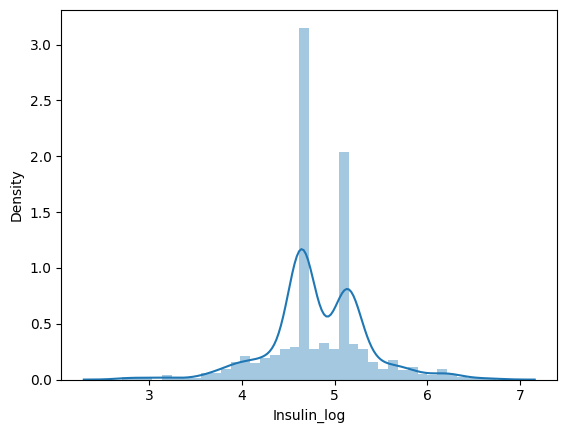

In [ ]:
# log값
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

# (성능향상법) 상관계수를 이용한 파생변수 생성하기

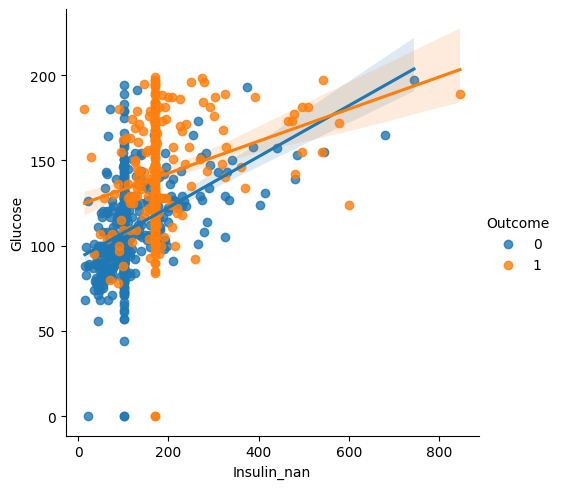

In [ ]:
sns.lmplot(data=df, x="Insulin_nan",y="Glucose", hue ="Outcome")
# 세로로 한 줄로 생기는 값은 결측치를 대체한 값들 (중앙값)

In [ ]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5) # 중앙값
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [ ]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


# (성능향상법) 이상치 다루기

<Axes: >

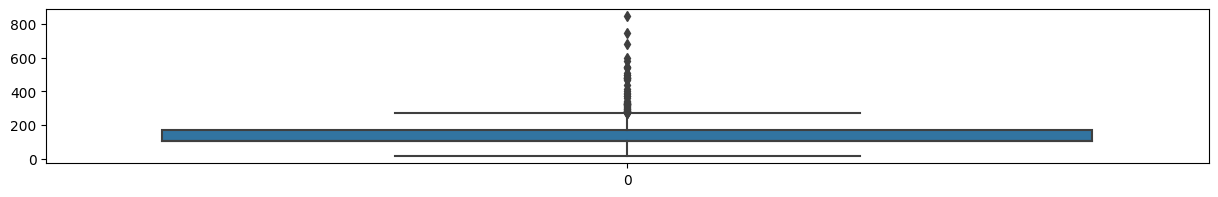

In [ ]:
plt.figure(figsize=(15, 2))
sns.boxplot(df["Insulin_nan"])

In [ ]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [ ]:
# 사분위값
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [ ]:
# 아웃라이너 값
# Q3보다 1.5 이상 초과하는 값을 이상치로 본다
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [ ]:
df[df["Insulin_nan"] > OUT].shape

(51, 16)

In [ ]:
train = df[df["Insulin_nan"] > 600].shape

# (성능향상법) 피처 스케일링(feature - scaling)
- sklearn에서 제공
- 일정한 수치로 값을 맞춰주는 것  (값이 들쭉날쭉하면 성능이 좋지 않을 수 있으므로!)
- standardscaler을 통해 범위를 일정하게 맞추어 준다.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [ ]:
#df[["Glucose", "DiabetesPedigreeFunction"]] = scale
#df[["Glucose", "DiabetesPedigreeFunction"]].head()

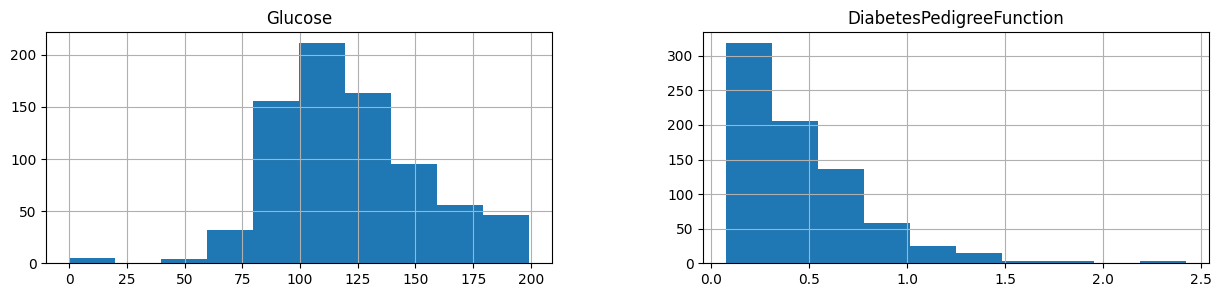

In [ ]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

# CSV 파일로 저장하기

In [ ]:
df.to_csv("diabetes_feature.csv", index=True)

In [ ]:
pd.read_csv("diabetes_feature.csv").head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


### 학습, 예측 데이터 나누기

In [ ]:
# 8:2 비율로 split. 학습데이터 : 테스트데이터 = 8:2
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 16)

In [ ]:
test = df[split_count:].copy()
test.shape

(154, 16)

### 학습, 예측에 사용할 칼럼 추출

In [ ]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

### 예측 칼럼 추출

In [ ]:
label_name = 'Outcome'
label_name

'Outcome'

## 학습, 예측 데이터셋 생성하기
- 학습데이터와 예측 데이터 행의 갯수가 일치하여야 한다

In [ ]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,169.5,False
1,85,66,29,26.6,0.351,31,False,102.5,True
2,183,64,0,23.3,0.672,32,True,169.5,False
3,89,66,23,28.1,0.167,21,False,94.0,True
4,137,40,35,43.1,2.288,33,False,168.0,False


In [ ]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X_test= test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,144.0,False
615,106,72,0,25.8,0.207,27,False,102.5,False
616,117,96,0,28.7,0.157,30,False,102.5,False
617,68,62,13,20.1,0.257,23,False,15.0,True
618,112,82,24,28.2,1.282,50,True,169.5,False


In [ ]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘 로드

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

### 학습

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 예측

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

# 시각화

## 트리 알고리즘

[Text(0.5366071428571428, 0.9615384615384616, 'Insulin_nan <= 143.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.325, 0.8846153846153846, 'Insulin_nan <= 109.0\ngini = 0.163\nsamples = 380\nvalue = [346, 34]'),
 Text(0.24285714285714285, 0.8076923076923077, 'BMI <= 49.95\ngini = 0.098\nsamples = 329\nvalue = [312, 17]'),
 Text(0.22857142857142856, 0.7307692307692307, 'Glucose <= 151.5\ngini = 0.082\nsamples = 326\nvalue = [312, 14]'),
 Text(0.19285714285714287, 0.6538461538461539, 'Insulin_nan <= 99.5\ngini = 0.062\nsamples = 312\nvalue = [302, 10]'),
 Text(0.17857142857142858, 0.5769230769230769, 'Insulin_nan <= 95.5\ngini = 0.154\nsamples = 119\nvalue = [109, 10]'),
 Text(0.16428571428571428, 0.5, 'BloodPressure <= 83.0\ngini = 0.127\nsamples = 117\nvalue = [109, 8]'),
 Text(0.11428571428571428, 0.4230769230769231, 'DiabetesPedigreeFunction <= 0.677\ngini = 0.088\nsamples = 108\nvalue = [103, 5]'),
 Text(0.05714285714285714, 0.34615384615384615, 'SkinThickness <= 31.5\

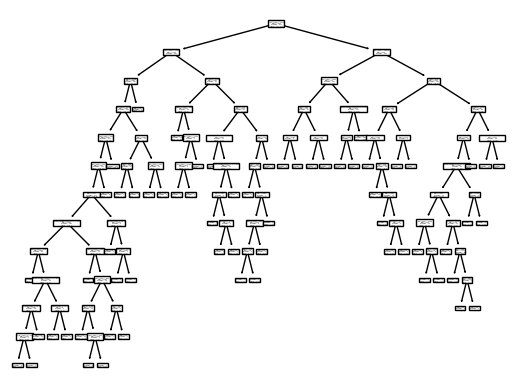

In [ ]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

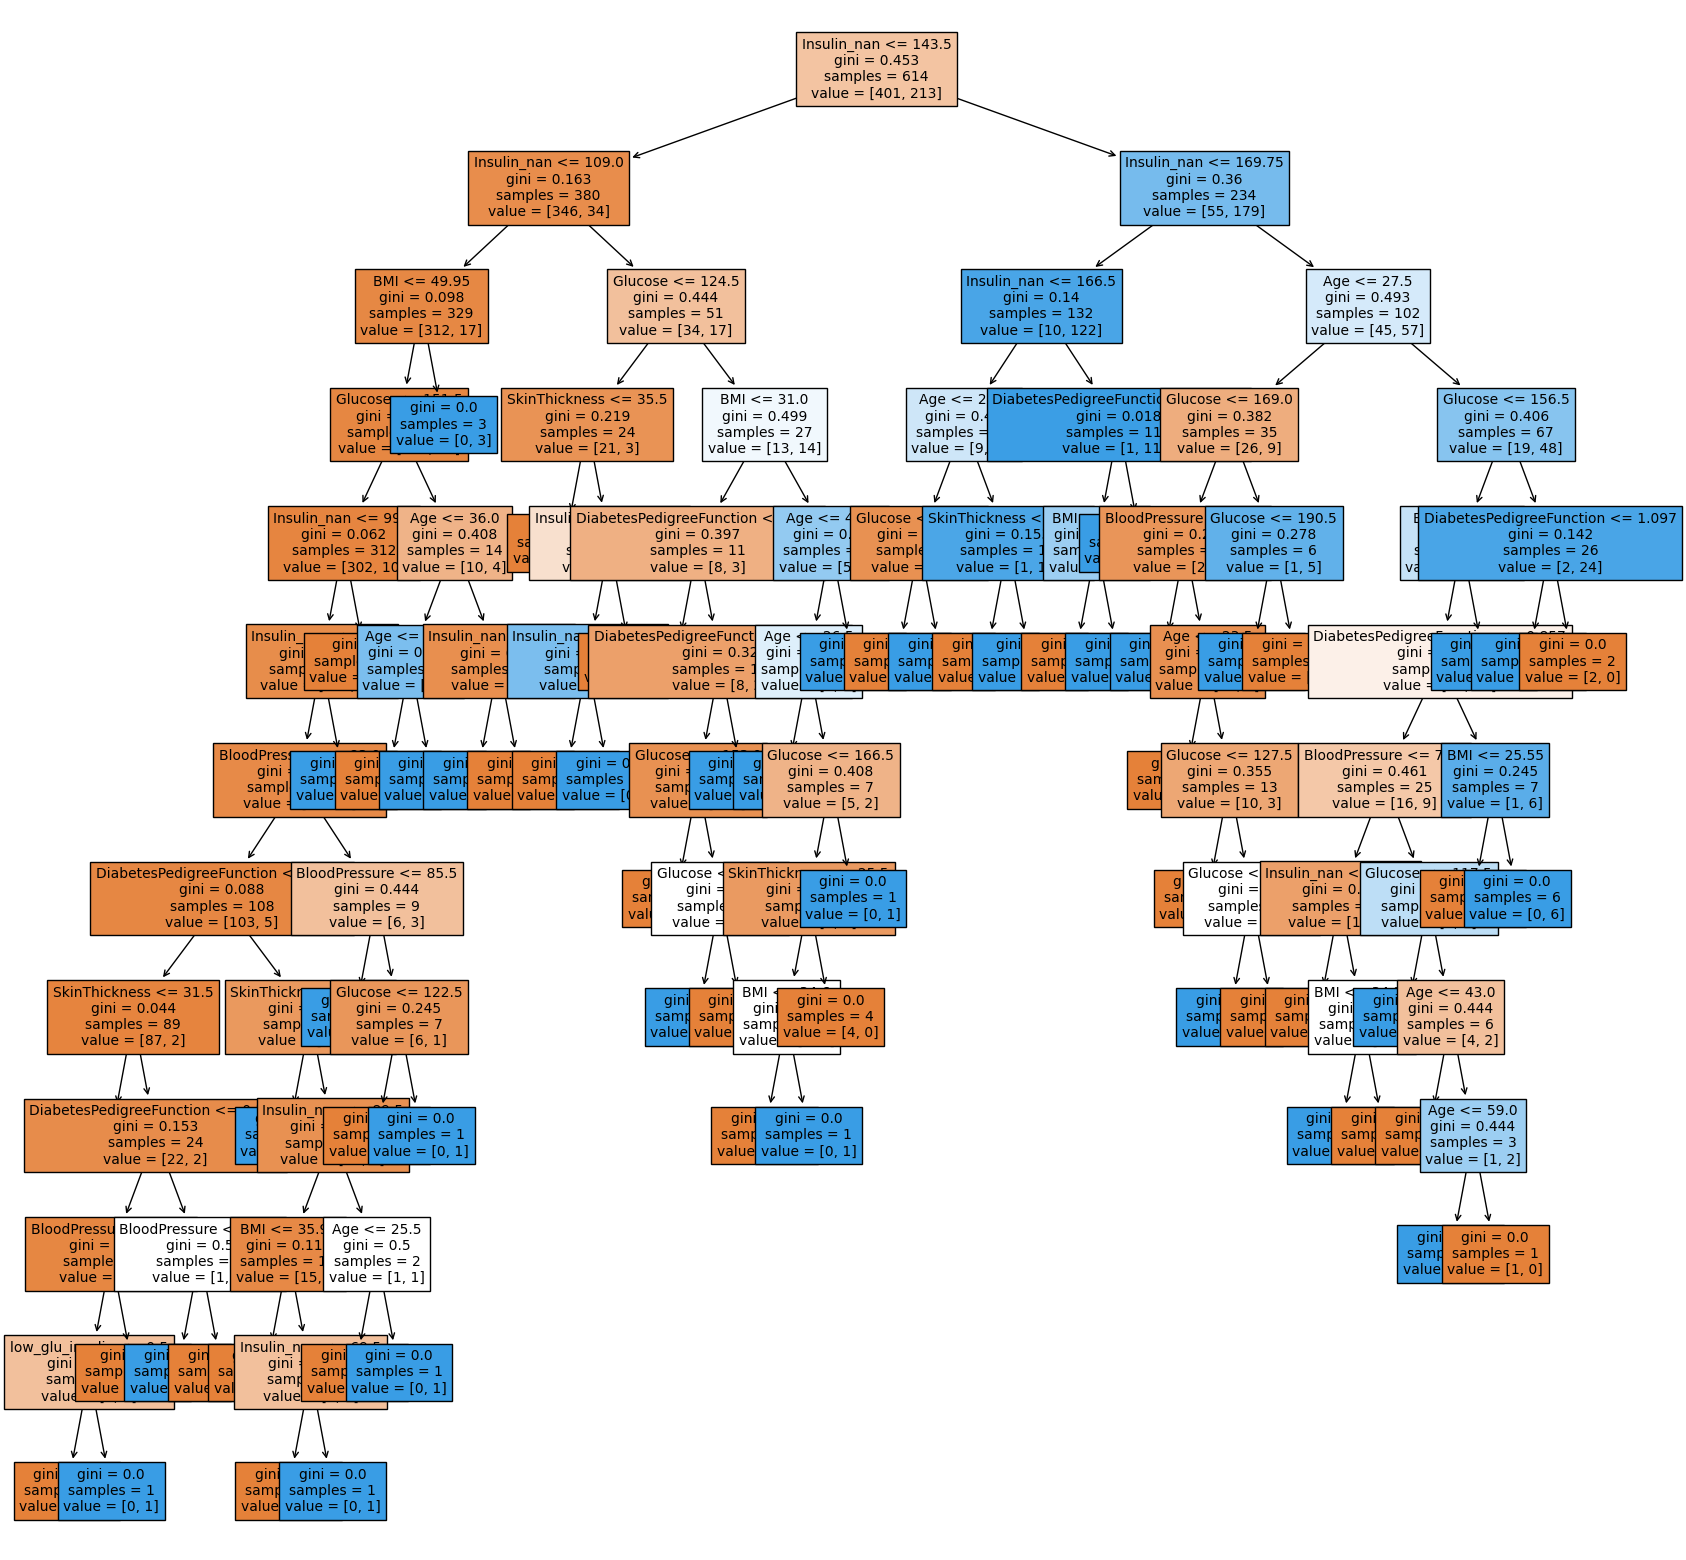

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                           filled=True,
                           fontsize=10)

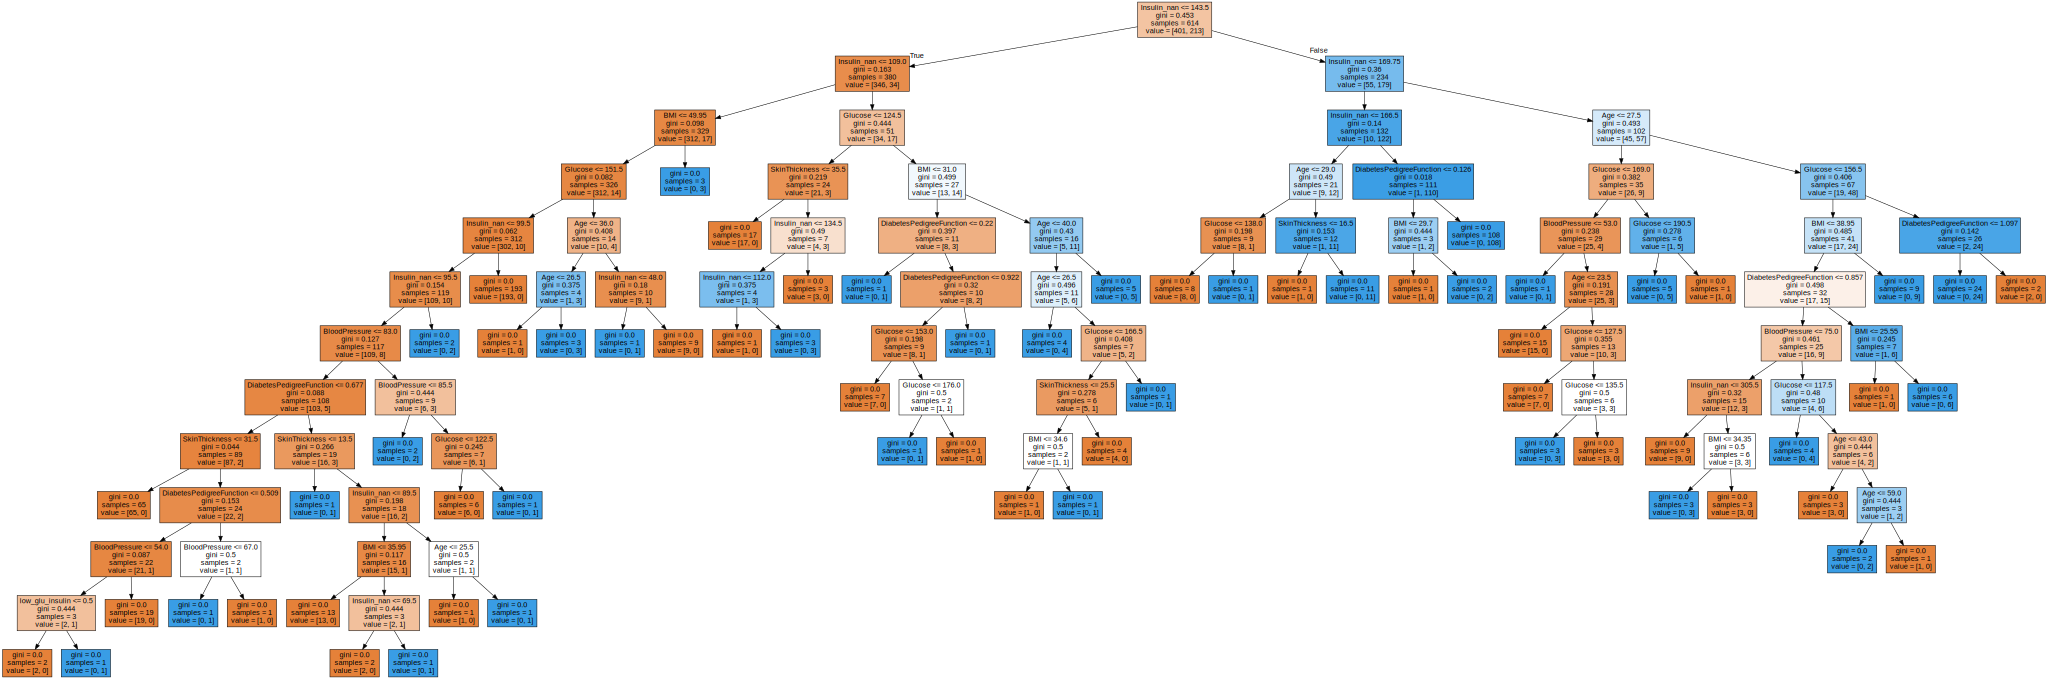

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

<Axes: >

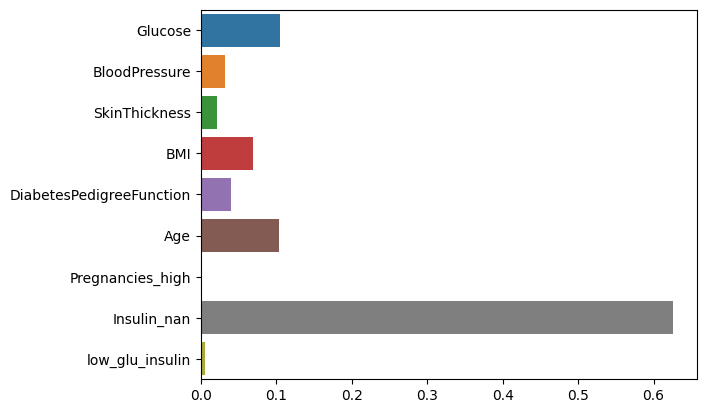

In [ ]:
# 피처의 중요도 시각화
# 클루코스가 당뇨병 여부를 결정하는 핵심 피처이다.
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
# 피처의 중요도 추충
model.feature_importances_

array([0.10413594, 0.03123385, 0.02178847, 0.06916399, 0.03940036,
       0.10320667, 0.        , 0.62627831, 0.0047924 ])

## 정확도 예측하기
글루코스에 따른 인슐린 비율
연령대에 따른 인슐린 데이터 등을 학습시키면 더 좋은 결과가 나올 수도 있음!

In [ ]:
# 실제값 - 예측값일 경우 같은 값은 0으로 나옴
# 절댓값을 취함
# 44- > 39 -> 49(age 25기준) -> 55(age 30 기준) -> 23(인슐린 결측치를 평균으로 대체)-> 16 (인슐린 결측치를 중앙값으로 대체) -> 16 (log로 값 변환) -> 15(인슐린과 글루코스 간의 파생변수)-> 15(인슐린 수치 이상치 600이상 제거 )
diff_count = abs(y_test - y_predict).sum()
diff_count

15

In [ ]:
abs(y_test - y_predict).sum() / len(y_test) # 28% 잘못 예측했다

0.09740259740259741

In [ ]:
# 71 -> 85(인슐린 결측치를 평균으로 대체) -> 89(인슐린의 결측치를 중앙값으로 대체) -> 89(log로 값 변환) -> 90(인슐린과 글루코스 간의 파생변수)
(len(y_test) - diff_count) / len(y_test) * 100 # 71% 맞았다

90.25974025974025

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9025974025974026

In [ ]:
# 범주화 74
# null 평균값으로 변환 85

model.score(X_test, y_test) * 100

90.25974025974025